## Recommending you Github users based on your Repositores and User Profile
#### 1. Content Based
#### 2. Collaborative Filtering based

#### This notebook will suggest you users that work in similar technologies, domains
<center>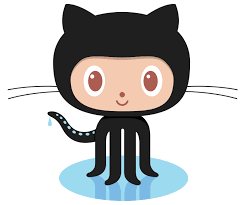

### <center>  This is an interactive Notebook - To experience it in action you will have to make a copy of the Notebook and Fill in the given details to see it in action.
<center><img src='https://pythonfix.com/pkg/p/pygithub/pygithub-banner.webp' height=300 width=300></center>


#### We will be using Pygithub and so to run the Notebook you will need a Personal Access Token
### <a href='https://www.google.com/search?q=How+to+generate+a+Github+PAT&rlz=1C1CHBF_enIN959IN959&oq=How+to+generate+a+Github+PAT&aqs=chrome..69i57j0i22i30l3j0i390l5.32507j0j7&sourceid=chrome&ie=UTF-8'> How to generate a Github Personal Access Token </a>

### Starting off with Importing and Setting up The Dependencies 🧱


In [2]:
# Importing the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import os
import json
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Installing PyGithub
!pip install pygithub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 KB 7.7 MB/s eta 0:00:0000:0100:01


### Personal Access Key for API -> Hidden 🤫🤫🤫


In [4]:
# Setting up the API Pygithub
# PAT and Access Key
from github import Github
g = Github("Your-Key-Here")
ACCESS_TOKEN = 'Your-Key-Here"'
client = Github(ACCESS_TOKEN, per_page=200)

### Building an ego centric Graph for your Github 🐺🐺🐺
### Change username here

In [5]:
users = ["AnshulMehta1"]
users[0]
user = client.get_user(users[0])

### Building the Graph 🕸
1. Directed Graph 
2. We start off from One User and then gradually factor in followers of other users as well


### Getting a Graph of Your Followers 🐏 🐏

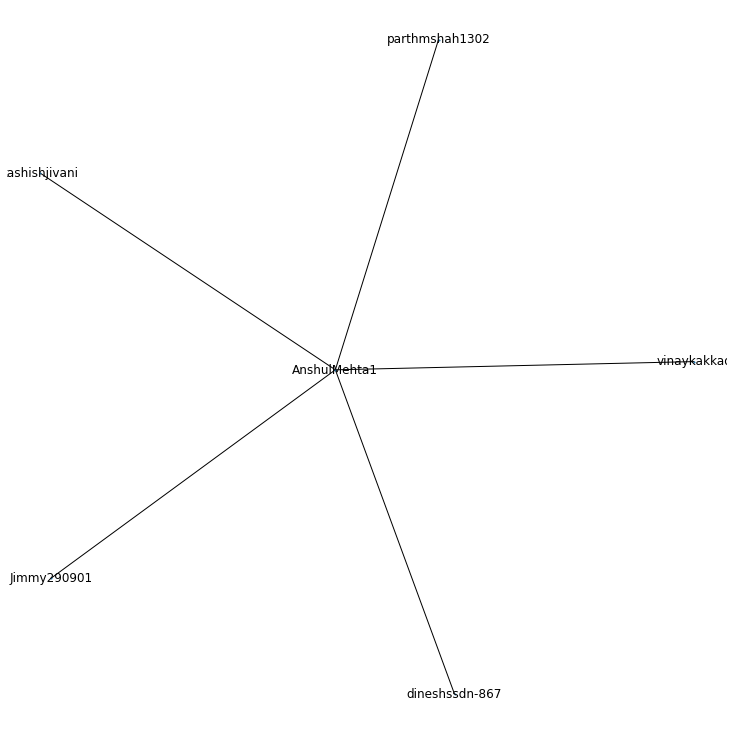

In [6]:
import networkx as nx
# Initialize two Empty Graphs
g1=nx.Graph()
g2=nx.Graph()
# Add the Root User as the first Node -> 'Myself'
g1.add_node(user.login, type='user')
# Initialize an Emmpty List for followers
followers=[]
# Get a list of followers 
followers = [ f for f in user.get_followers() ]
# Now add Nodes and Edges 
for follower in followers:
    # Add the Follower as a Node
    g1.add_node(follower.login , type='user')
    # Add Edges from the User to Follower or Vice Versa (Unidirectional Graph)
    g1.add_edge(follower.login , user.login, type='follows')
# Draw the Graph of the Followers
plt.figure(figsize=(10,10))
nx.draw(g1, with_labels=True, node_size=1)
# Now we have the List of followers in Followers
plt.show()

### We will need More Nodes and so Let's Bring in Followers of Followers 🐑🐏 😅
#### This will be Your Social Network 2nd Layer and we will go ahead with this Network

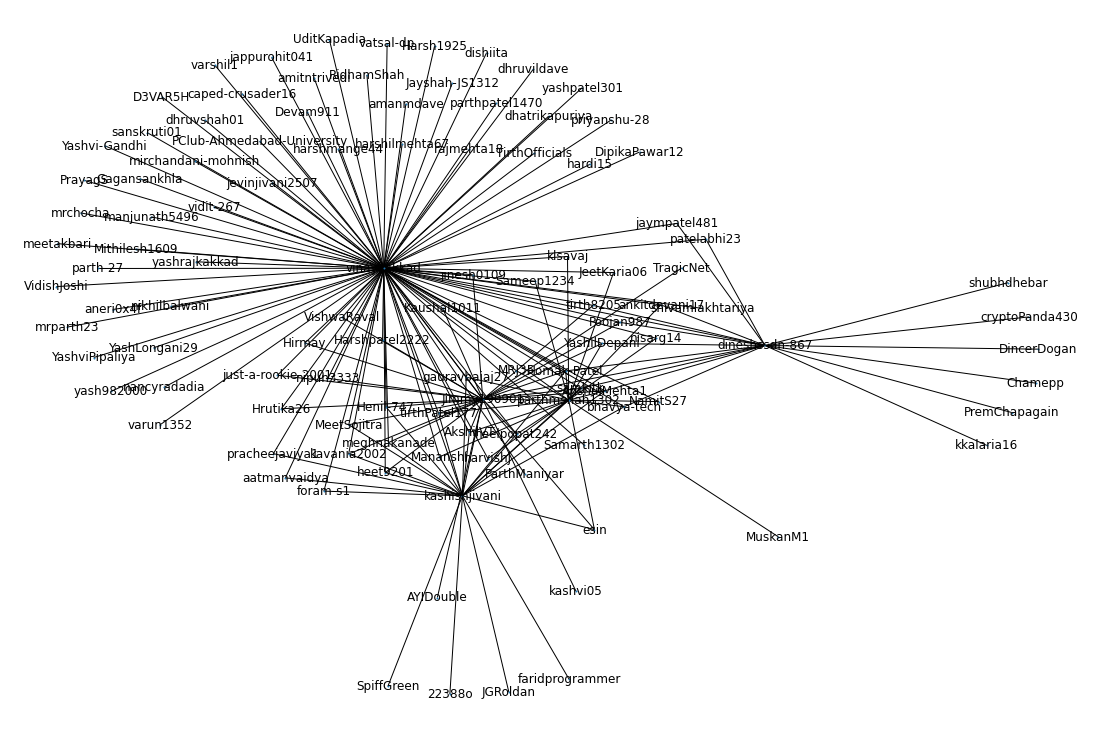

In [7]:
# Now we have the List of the Followers as well
# Now for each of the followers we will need  a Set of followers - We will need Only Unique users for the CHeck
followers_of_followers=set()
# This is will be used in each Iteration
f_of_f_dummy=[]
# For each Follower in followers
for follower in followers:
  f_of_f_dummy = [ s for s in follower.get_followers() ]
  # #Keep adding the Users in the Set - Important for the Check
  for f in f_of_f_dummy:
    followers_of_followers.add(f)
  # Now we will iterate the followers of followers List to Build the Graph
  for f_of_f in f_of_f_dummy:
    # Add the Node for the Follower
    g1.add_node(f_of_f.login , type='user')
    # Now add the edge between the follower and the follower of follower
    g1.add_edge(f_of_f.login,follower.login,type='follows')

plt.figure(figsize=(15,10))
nx.draw(g1, with_labels=True, node_size=1)
plt.show()

### Building a Directed Graph as Well

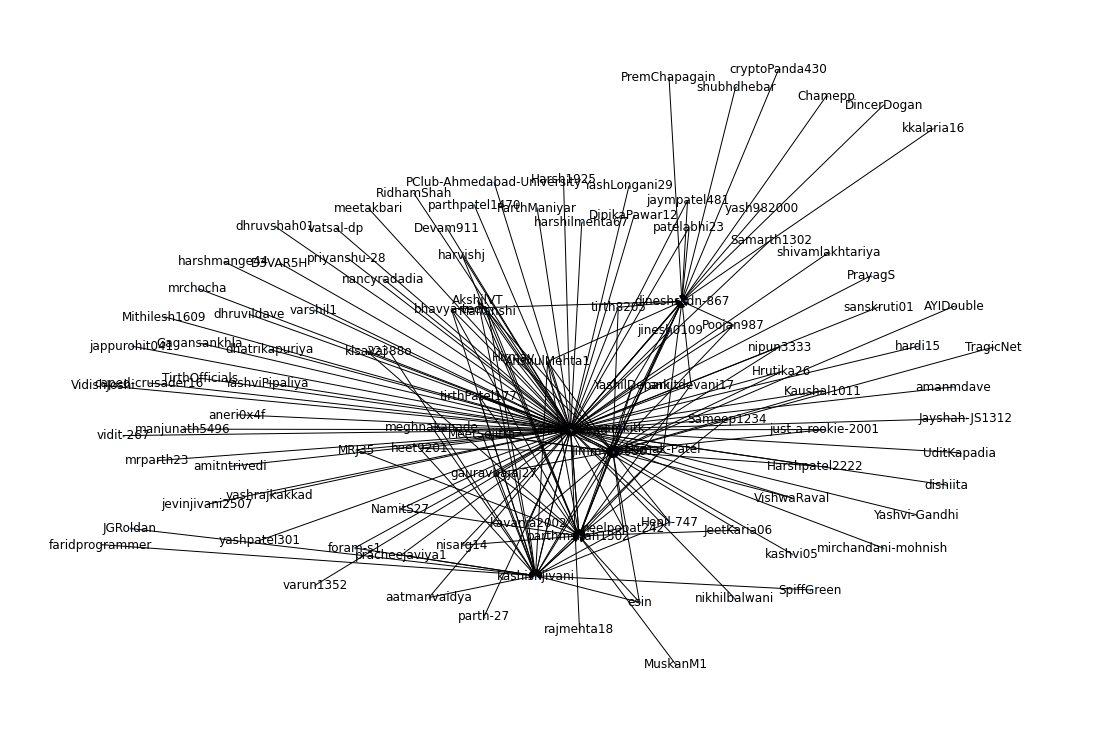

In [8]:
# Now we have the List of the Followers as well
# Now for each of the followers we will need  a Set of followers - We will need Only Unique users for the CHeck
# This is will be used in each Iteration
gd=nx.DiGraph()
f_of_f_dummy1=[]
# For each Follower in followers
for follower in followers:
  f_of_f_dummy1 = [ s for s in follower.get_followers() ]
  # Now we will iterate the followers of followers List to Build the Graph
  for f_of_f in f_of_f_dummy1:
    gd.add_edge(f_of_f.login,follower.login,type='follows')

plt.figure(figsize=(15,10))
nx.draw(gd, with_labels=True, node_size=1)
plt.show()

### Getting the properties of the users like Closeness centrality, Betweenness centrality, Clustering co-efficient and reciprocirty.

In [20]:
dc=nx.degree_centrality(g1)
idc=nx.in_degree_centrality(gd)
cc=nx.closeness_centrality(g1)
bc=nx.betweenness_centrality(g1)
clustering_coeff=nx.clustering(g1)
rcp=nx.reciprocity(gd)

In [34]:
# Iterate the values
# dc.values()
# idc.values()
# cc.values()
# bc.values()
# clustering_coeff.values()


dict_values([0.8, 0.016830294530154277, 0.14333333333333334, 0.15810276679841898, 0.1111111111111111, 0.11827956989247312, 0, 0, 0, 0.8, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0.8333333333333334, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6666666666666666, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 0.6666666666666666, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
deg_cen=[]
in_deg_cen=[]
closeness=[]
betweenness=[]
clustering=[]
recipro=[]
for i in dc.values():
    deg_cen.append(i)
for i in idc.values():
    in_deg_cen.append(i)
for i in cc.values():
    closeness.append(i)
for i in bc.values():
    betweenness.append(i)
for i in clustering_coeff.values():
    clustering.append(i)
# for i in rcp:
#     recipro.append(i)
    
    

### Building the Weighted Graph and Influence Analysis

In [31]:
contrib_num=[]
followers_num=[]
following_num=[]
gists_num=[]
repos_num=[]
user_list_c=[]
private_repos=[]
private_gists=[]
for i in followers_of_followers:
    contrib=i.contributions
    followerss=i.followers
    following=i.following
    gist=i.public_gists
    repo=i.public_repos
    name=i.name
    prepos=i.total_private_repos
    pgists=i.private_gists
    contrib_num.append(contrib)
    followers_num.append(followerss)
    following_num.append(following)
    gists_num.append(gist)
    repos_num.append(repo)
    user_list_c.append(name)
    private_repos.append(prepos)
    private_gists.append(pgists)
dfc=pd.DataFrame(user_list_c,columns=['user'])
# dfc['contributions']=contrib_num
dfc['followers']=followers_num
dfc['following']=following_num
dfc['gists']=gists_num
dfc['numrepos']=repos_num
# dfc['private_gists']=private_gists
# dfc['private_repos']=private_repos

In [32]:
dfc['degree centrality']=deg_cen
dfc['in degree cen']=in_deg_cen
dfc['betweenness']=betweenness
dfc['closeness']=closeness


In [36]:
dfc['clustering coefficient']=clustering

In [37]:
dfc.head(100)

,user,followers,following,gists,numrepos,degree centrality,in degree cen,betweenness,closeness,clustering coefficient
0,Yashil Depani,54,70,0,18,0.046296,0.000000,0.001312,0.511848,0.800000
1,Namit Shah,100,161,0,29,0.861111,0.861111,0.846086,0.878049,0.016830
2,None,12,9,0,24,0.231481,0.000000,0.089249,0.548223,0.143333
3,Vishwa Raval,10,16,0,7,0.212963,0.000000,0.041871,0.542714,0.158103
4,Foram Shah,36,31,0,13,0.166667,0.000000,0.112744,0.532020,0.111111
...,...,...,...,...,...,...,...,...,...,...
95,Meet Sojitra,15,52,0,1,0.009259,0.000000,0.000000,0.355263,0.000000
96,Harsh Mange,24,29,0,31,0.009259,0.000000,0.000000,0.355263,0.000000
97,Prayag Savsani,75,67,0,34,0.009259,0.000000,0.000000,0.355263,0.000000
98,22388o⚡️,743,7239,0,1268,0.009259,0.000000,0.000000,0.355263,0.000000


In [38]:
dfc=dfc.fillna(0)
dfcu=dfc.drop(columns='user')

### Building the Collaborative Filtering Link Prediction

In [39]:
# Cosine Distance 
# Pearson Correlation
def normalize(row):
    new_row=(row-row.mean())/(row.max()-row.min())
    return new_row
dfc_normalize=dfcu.apply(normalize)
dfc_normalize.head()


,followers,following,gists,numrepos,degree centrality,in degree cen,betweenness,closeness,clustering coefficient
0,-0.026901,-0.021812,-0.027523,-0.018705,0.018049,-0.018645,-0.011413,0.084183,0.450327
1,-0.020339,-0.020687,-0.027523,-0.011694,0.974571,0.981355,0.987036,0.775569,-0.332842
2,-0.032893,-0.022566,-0.027523,-0.014881,0.235441,-0.018645,0.092521,0.152859,-0.206339
3,-0.033178,-0.022479,-0.027523,-0.025716,0.213702,-0.018645,0.036525,0.142457,-0.191570
4,-0.029469,-0.022294,-0.027523,-0.021892,0.159354,-0.018645,0.120289,0.122267,-0.238562


In [40]:
dfcu.head()

,followers,following,gists,numrepos,degree centrality,in degree cen,betweenness,closeness,clustering coefficient
0,54,70,0,18,0.046296,0.000000,0.001312,0.511848,0.800000
1,100,161,0,29,0.861111,0.861111,0.846086,0.878049,0.016830
2,12,9,0,24,0.231481,0.000000,0.089249,0.548223,0.143333
3,10,16,0,7,0.212963,0.000000,0.041871,0.542714,0.158103
4,36,31,0,13,0.166667,0.000000,0.112744,0.532020,0.111111


In [41]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
# Similarity of Features and Users
user_similarity=cosine_similarity(dfcu)

# Feature Similarity
feature_similarity=cosine_similarity(dfcu.T)

In [ ]:
# dfcu['user']=dfc['user']

In [42]:
user_similarity

array([[1.        , 0.99376959, 0.66964241, ..., 0.57108099, 0.98691549,
        0.7325768 ],
       [0.99376959, 1.        , 0.61639276, ..., 0.50995118, 0.98536487,
        0.69954412],
       [0.66964241, 0.61639276, 1.        , ..., 0.9912651 , 0.73486406,
        0.9793178 ],
       ...,
       [0.57108099, 0.50995118, 0.9912651 , ..., 1.        , 0.64055914,
        0.9522063 ],
       [0.98691549, 0.98536487, 0.73486406, ..., 0.64055914, 1.        ,
        0.80964926],
       [0.7325768 , 0.69954412, 0.9793178 , ..., 0.9522063 , 0.80964926,
        1.        ]])

In [43]:
numrows = len(user_similarity)    # 3 rows in your example
numcols = len(user_similarity[0]) 
print(numrows,numcols)

109 109


In [44]:
usdf=pd.DataFrame(user_similarity,index=dfc['user'],columns=dfc['user'])
fsdf=pd.DataFrame(feature_similarity,index=dfcu.columns,columns=dfcu.columns)

In [45]:
usdf.head()
# fsdf.head()

user,Yashil Depani,Namit Shah,0,Vishwa Raval,Foram Shah,Tirth Bharatbhai Kanani,Hrutika Patel,Harsh Modi,Harsh Patel,Dincer Dogan,...,Muskan Matwani,0,Henil Shah,Tirth Patel,Parth Shah,Sanskruti Shingala,Samkit K,0,Neel Popat,Kirtan Kalaria
user,,,,,,,,,,,,,,,,,,,,,
Yashil Depani,1.000000,0.993770,0.669642,0.983381,0.978396,0.982258,0.982749,0.961476,0.965820,0.810183,...,0.981103,0.982072,0.962817,0.968214,0.964251,0.961400,0.987735,0.571081,0.986915,0.732577
Namit Shah,0.993770,1.000000,0.616393,0.979075,0.949593,0.996373,0.992500,0.978079,0.979814,0.826580,...,0.994318,0.958440,0.931439,0.957903,0.958381,0.928500,0.997610,0.509951,0.985365,0.699544
0,0.669642,0.616393,1.000000,0.758603,0.733891,0.604189,0.525325,0.663769,0.678177,0.786759,...,0.630212,0.788393,0.831146,0.812848,0.799165,0.827543,0.633166,0.991265,0.734864,0.979318
Vishwa Raval,0.983381,0.979075,0.758603,1.000000,0.955233,0.977064,0.947939,0.982132,0.986115,0.898965,...,0.982659,0.981475,0.968762,0.995757,0.994517,0.964674,0.984255,0.667739,0.998905,0.830031
Foram Shah,0.978396,0.949593,0.733891,0.955233,1.000000,0.922808,0.934765,0.895223,0.904161,0.741501,...,0.922511,0.991411,0.986319,0.950265,0.937975,0.988110,0.935620,0.652437,0.954046,0.756753


### In this frame Common Neighbour Centrality, pairwise Cosine

### Getting the similarities


In [46]:
# def get_similar_users:
    
def get_similar_features(feature_name,rating_given):
    similar_score=fsdf[feature_name]*rating_given
    similar_score=similar_score.sort_values(ascending=False)
    return similar_score
print(get_similar_features("gists",26))
# This will dynamically channge for all the users

gists                     26.000000
closeness                  6.323819
following                  4.686899
followers                  4.476407
clustering coefficient     1.911343
numrepos                   1.127960
degree centrality          0.995259
in degree cen              0.389511
betweenness                0.013491
Name: gists, dtype: float64


### Feature similarity

In [47]:
fsdf.head()

,followers,following,gists,numrepos,degree centrality,in degree cen,betweenness,closeness,clustering coefficient
followers,1.000000,0.937398,0.172170,0.237091,0.033898,0.012092,0.009630,0.223545,0.022525
following,0.937398,1.000000,0.180265,0.132734,0.019898,0.002374,0.001621,0.178201,0.004443
gists,0.172170,0.180265,1.000000,0.043383,0.038279,0.014981,0.000519,0.243224,0.073513
numrepos,0.237091,0.132734,0.043383,1.000000,0.054436,0.024770,0.016726,0.223191,0.078934
degree centrality,0.033898,0.019898,0.038279,0.054436,1.000000,0.782105,0.938440,0.412764,0.181146


### User Similarity

In [48]:
usdf.head()

user,Yashil Depani,Namit Shah,0,Vishwa Raval,Foram Shah,Tirth Bharatbhai Kanani,Hrutika Patel,Harsh Modi,Harsh Patel,Dincer Dogan,...,Muskan Matwani,0,Henil Shah,Tirth Patel,Parth Shah,Sanskruti Shingala,Samkit K,0,Neel Popat,Kirtan Kalaria
user,,,,,,,,,,,,,,,,,,,,,
Yashil Depani,1.000000,0.993770,0.669642,0.983381,0.978396,0.982258,0.982749,0.961476,0.965820,0.810183,...,0.981103,0.982072,0.962817,0.968214,0.964251,0.961400,0.987735,0.571081,0.986915,0.732577
Namit Shah,0.993770,1.000000,0.616393,0.979075,0.949593,0.996373,0.992500,0.978079,0.979814,0.826580,...,0.994318,0.958440,0.931439,0.957903,0.958381,0.928500,0.997610,0.509951,0.985365,0.699544
0,0.669642,0.616393,1.000000,0.758603,0.733891,0.604189,0.525325,0.663769,0.678177,0.786759,...,0.630212,0.788393,0.831146,0.812848,0.799165,0.827543,0.633166,0.991265,0.734864,0.979318
Vishwa Raval,0.983381,0.979075,0.758603,1.000000,0.955233,0.977064,0.947939,0.982132,0.986115,0.898965,...,0.982659,0.981475,0.968762,0.995757,0.994517,0.964674,0.984255,0.667739,0.998905,0.830031
Foram Shah,0.978396,0.949593,0.733891,0.955233,1.000000,0.922808,0.934765,0.895223,0.904161,0.741501,...,0.922511,0.991411,0.986319,0.950265,0.937975,0.988110,0.935620,0.652437,0.954046,0.756753


In [49]:
def get_similar_users(userName,aggregate_score):
    similar_score1=usdf[userName]*aggregate_score
    similar_score1=similar_score1.sort_values(ascending=False)
    return similar_score1
# Aggregate is an aggregate of the followers, gists, repos and followings
anshullist=get_similar_users("Anshul Mehta",26)

In [50]:
for i in anshullist.index:
    print(i)

Anshul Mehta
0
0
0
Gaston Roldan
Tirth Patel
Kirtan Kalaria
0
dineshssdn-867
mirchandani-mohnish
Harsh Mange
Nikhil Balwani
uditk
Hirmay Sandesara
Sameep Vani
Dincer Dogan
Parth Maniyar
Aatman Vaidya
Nipun Patel
0
Varshil Shah
0
Jay Shah
Kashvi Gandhi
Tirth Patel
Parth Shah
Henil Shah
Ridham Shah
Rahul Chocha
Sanskruti Shingala
0
0
Kaushal
mithilesh thakkar
Ankit Devani
Aneri Dalwadi
Harshil Mehta
Mananshi
Manav Vagrecha
0
Vishwa Raval
0
Shivam Lakhtariya
Neel Popat
Dipika Pawar
Nancy Radadia
Prayag Savsani
Jap Purohit
Jaimik Patel
Dhruv Shah
Harsh Patel
Priyanshu Pathak
Harsh Modi
Prachee Javiya
Foram Shah
Meet Akbari
Vidish Joshi
Hardi Kadia
Parth Patel
Bhavya Peshavaria
Aman Dave
Krunal Savaj
Shubham Jain
Jeet Karia
Devarsh Patel
Yashil Depani
Muskan Matwani
Samkit K
YASH PATEL
Yash Patel
Samarth Chauhan
Vatsal Patel
Gaurav Bajaj
Yashraj Kakkad
Manjunath.R
Tirth Bharatbhai Kanani
Martand Javia
22388o⚡️ 
Dhruvil Dave
Namit Shah
0
Jinesh Salot
Harvish
Spiff Jekey-Green
Parth Sarkhelia

### Getting the Data for Content Based Filtering 😎😎😎

In [51]:
UserList=[]
TwodList=[]
for u in followers_of_followers:
  UserList.append(u.name)
  repo=u.get_repos()
  userRepoList=[]
  # For Lopp for getting the Keywords of Repo
  for r in repo:
    # Add a try catch here to avoid errors
    try:
      userRepoList.append(str(r.name))
      userRepoList.append(str(r.description))
      userRepoList.append(str(r.language))
      # userRepoList.append(r.get_topics())
    except:
      continue
  TwodList.append(userRepoList)


In [ ]:
TwodList

### Building the DataFrame for the Recommender System

In [ ]:
sna=pd.DataFrame(UserList)
sna.rename(columns={0:'user'}, inplace=True)
sna['Topics']=TwodList

In [ ]:
# Now we will convert the List of tags into Strings for better Usability
sna['Topics']=sna['Topics'].apply(lambda x:[i.replace(" ","") for i in x])

### Lambdda Function to Get the Strings concatenated 🤩

In [ ]:
# Now we will convert the List of tags into Strings for better Usability
sna['Topics']=sna['Topics'].apply(lambda x: " ".join(x))
# Converting everything to lowercase
sna['Topics']=sna['Topics'].apply(lambda x: x.lower())

### Using stemming  🌲🌳

**Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    string=" ".join(y)
    return string

In [ ]:
# Stemming the Column
sna['Topics']=sna['Topics'].apply(stem)

In [ ]:
# Approaches
# 1) Bag of Words
# 2) Word2Vec
# 3) tfidf
#  We will be using both Bag of Words and TF * IDF and will take the better one
from sklearn.feature_extraction.text import TfidfVectorizer
# Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')


In [ ]:
vectors=cv.fit_transform(sna['Topics']).toarray()

In [ ]:
# TF IDF

tfIdfVectorizer=TfidfVectorizer(use_idf=True,max_features=10000,stop_words='english')
tfIdf = tfIdfVectorizer.fit_transform(sna['Topics'])
# We will be using this vector, which is same as vectors
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

In [ ]:
# Calculating the Cosine distance in the bag of words and TF IDF Model to find the similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
similarity_bow=cosine_similarity(vectors)
similarity_tfidf=cosine_similarity(tfIdf)

In [ ]:
# Distance of each Movie with Each Movie so shape will be n x n 
print(similarity_bow.shape)
print(similarity_tfidf.shape)

In [ ]:
# How to not loose index while sorting
# Call the enumerate Function
print(sorted(list(enumerate(similarity_bow[0])),reverse=True,key=lambda x:x[1])[1:11])
print(sorted(list(enumerate(similarity_tfidf[0])),reverse=True,key=lambda x:x[1])[1:11])

### Content based Recommender 📚📕📔

In [ ]:
def recommend(user):
    # Fetch the Index from the Similarity Array
    # Then sort the distances in descending order of that index and return the top10 
    # They will be the most similar movies to the  given Movie
    user_index=sna[sna['user']==user].index[0]
    distances_bow=similarity_bow[user_index]
    distances_tfidf=similarity_tfidf[user_index]
    users_list_bow=sorted(list(enumerate(distances_bow)),reverse=True,key=lambda x:x[1])[1:11]
    users_list_tfidf=sorted(list(enumerate(distances_tfidf)),reverse=True,key=lambda x:x[1])[1:11]
    print("Users recommended by Bag of Words Method")
    for i in users_list_bow:
        
        #print(i[0])
        print(sna.iloc[i[0]].user)
    print("Users recommended by TF-IDF")
    for i in users_list_tfidf:
        
        #print(i[0])
        print(sna.iloc[i[0]].user)

In [ ]:

def recommendrtlist(user):
    rtlist=[]
    # Fetch the Index from the Similarity Array
    # Then sort the distances in descending order of that index and return the top10 
    # They will be the most similar movies to the  given Movie
    user_index=sna[sna['user']==user].index[0]
    distances_bow=similarity_bow[user_index]
    distances_tfidf=similarity_tfidf[user_index]
    users_list_bow=sorted(list(enumerate(distances_bow)),reverse=True,key=lambda x:x[1])[1:11]
    users_list_tfidf=sorted(list(enumerate(distances_tfidf)),reverse=True,key=lambda x:x[1])[1:11]
#     print("Users recommended by Bag of Words Method")
#     for i in users_list_bow:
        
        #print(i[0])
#         print(sna.iloc[i[0]].user)
#     print("Users recommended by TF-IDF")
    for i in users_list_tfidf:
        
        #print(i[0])
        user=(sna.iloc[i[0]].user)
        rtlist.append(user)
        
    return rtlist

In [ ]:
recommendrtlist('Anshul Mehta')

In [ ]:
sna.head()

### See which Users in Social Network are the Closest to you 🤗🤗🤗

In [ ]:
recommend('Anshul Mehta')

In [ ]:
recommend('Vinay Kakkad')

In [ ]:
# Plot for all 

### Adding More Social Network Analysis Flavour with a comparative Approach from NetworkX Link Prediction Algorithms 


In [ ]:
preds1= nx.jaccard_coefficient(g1)
# Also we will calculate similarity using our own Jaccard Sklearn method
preds2 = nx.adamic_adar_index(g1)
preds3 = nx.common_neighbor_centrality(g1)

In [ ]:
# All are tuples of tuples
jaccard=[]
adamic_adar=[]
com_neighbour=[]
temp_list=[]
for i in preds1:
    temp_list=list(i)
    jaccard.append(temp_list)
for i in preds2:
    temp_list=list(i)
    adamic_adar.append(temp_list)
for i in preds3:
    temp_list=list(i)
    com_neighbour.append(temp_list)
    

In [ ]:
dfj=pd.DataFrame(jaccard,columns=['To','From','Score'])
dfa=pd.DataFrame(adamic_adar,columns=['To','From','Score'])
dfc=pd.DataFrame(com_neighbour,columns=['To','From','Score'])

In [ ]:
dfj=dfj.sort_values(by=['Score'],ascending=False)
dfa=dfa.sort_values(by=['Score'],ascending=False)
dfc=dfc.sort_values(by=['Score'],ascending=False)

In [ ]:
dfjh=dfj.head(1000)
dfah=dfa.head(1000)
dfch=dfc.head(1000)

In [ ]:
dfjh.head()

### Plotting the Graph for Top 1000 Entries for each Type of Link Prediction

In [ ]:
g2=nx.Graph()
g3=nx.Graph()
g4=nx.Graph()
for i in range(len(dfjh)):
    g2.add_edge(dfjh.iloc[i,0],dfjh.iloc[i,1])

plt.figure(figsize=(15,10))
nx.draw(g2, with_labels=True, node_size=1)
plt.show()

In [ ]:
for i in range(len(dfah)):
    g3.add_edge(dfah.iloc[i,0],dfah.iloc[i,1],type='user')

plt.figure(figsize=(15,10))
nx.draw(g3, with_labels=True, node_size=1)
plt.show()

In [ ]:
for i in range(len(dfch)):
    g4.add_edge(dfch.iloc[i,0],dfch.iloc[i,1],type='user')


plt.figure(figsize=(15,10))
nx.draw(g4, with_labels=True, node_size=1)
plt.show()

Inference: Outliers are same in this Graph
All of the Graphs nearly give the same Prediction of Links to follow
The outer Clusters remains same in almost all
The Inner cluster we are seeing that it is concentrated for a few users forming the bigger circle.


### Finally Plotting the Graph our recommender has predicted:


### Comparing Individual Link Predictions

In [ ]:
!pip install pyvis
from pyvis.network import Network

In [ ]:
netj = Network()
neta = Network()
netc = Network()

In [ ]:
# Before that we will need only 10 Per User for this - Probably the 10 strongest
# Now draw the Graphs of these links with wieghts that are given.
g5=nx.Graph()
dfa1=dfjh.loc[dfjh['To']=='AnshulMehta1']
for i in range(len(dfa1)):
    g5.add_edge(dfa1.iloc[i,0],dfa1.iloc[i,1], weight=dfa1.iloc[i,2])

In [ ]:
dfa2=dfah.loc[dfah['To']=='AnshulMehta1']


In [ ]:
dfa3=dfch.loc[dfch['To']=='AnshulMehta1']

In [ ]:
dfa3.head()

### Analyzing the Triads in the Graph

In [ ]:
triads=nx.all_triads(gd)

In [ ]:
triads

In [ ]:
num_triads=0
for i in triads:
    num_triads=num_triads+1
    if(num_triads<30):
        
        nx.draw(i,with_labels=True)
    else:
        break

### Draw a Triad for a Particular User

In [ ]:
# num_triads=0
# # Create a List of Generator graph classes
# gen_list=[]
# for j in triads:
#     node_list=i.nodes
#     if("AnshulMehta1" in node_list):
#         gen_list.append(j)
# for i in gen_list:
#     nx.draw(i,with_labels=True)

In [ ]:
num_triads=0
# Create a List of Generator graph classes
# gen_list=[]
# for j in triads:
#     node_list=i.nodes
#     if("AnshulMehta1" in node_list):
#         gen_list.append(j)
    
    
for i in triads:
    num_triads=num_triads+1
    # Check for Each Graphs Node if it has the User  Anshul Mehta
    node_list=i.nodes
   
    if("AnshulMehta1" in node_list):
        nx.draw(i,with_labels=True)
            
    else:
        continue
plt.show()     

### Picking random Triads for Anshul Mehta

In [ ]:
rt=nx.random_triad(gd)
nx.draw(rt,with_labels=True)

### As we can see a Lot of Triads actually being formed are the ones that are Predicted

### Other Analysis

In [ ]:
preds = nx.common_neighbor_centrality(g1)
preds

In [ ]:
for i in preds:
    print(i)